Files inside ZIP: ['gender_submission.csv', 'test.csv', 'train.csv']

Train Shape: (891, 12)
Test Shape: (418, 11)

Missing values after cleaning:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
FamilySize     0
dtype: int64


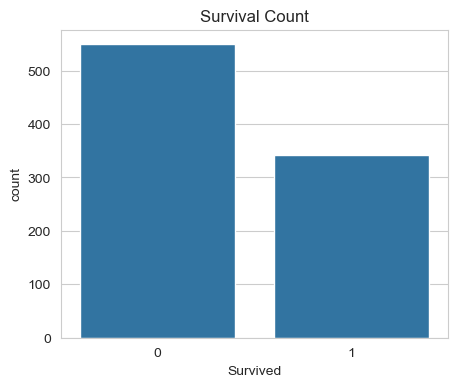

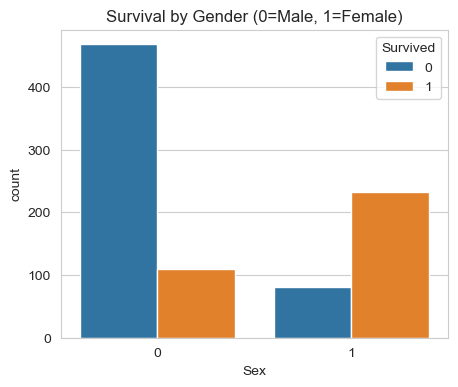

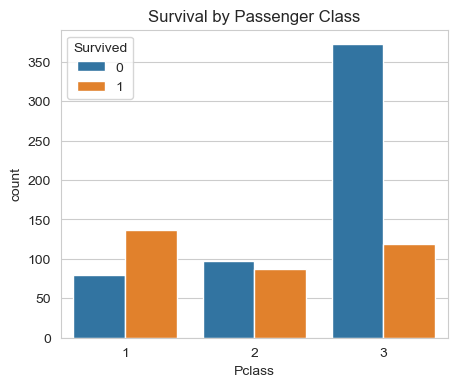

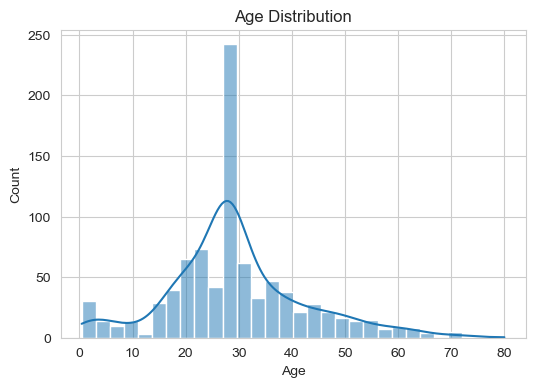

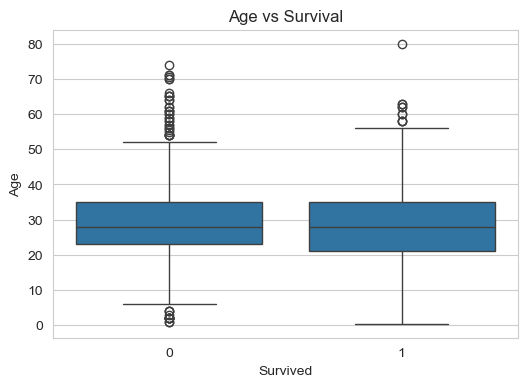

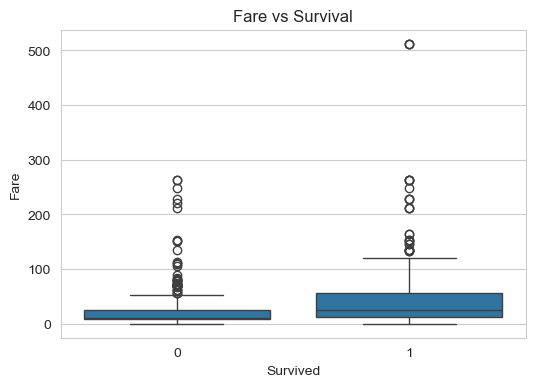

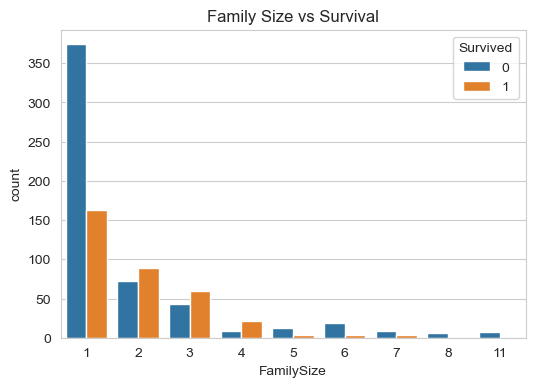

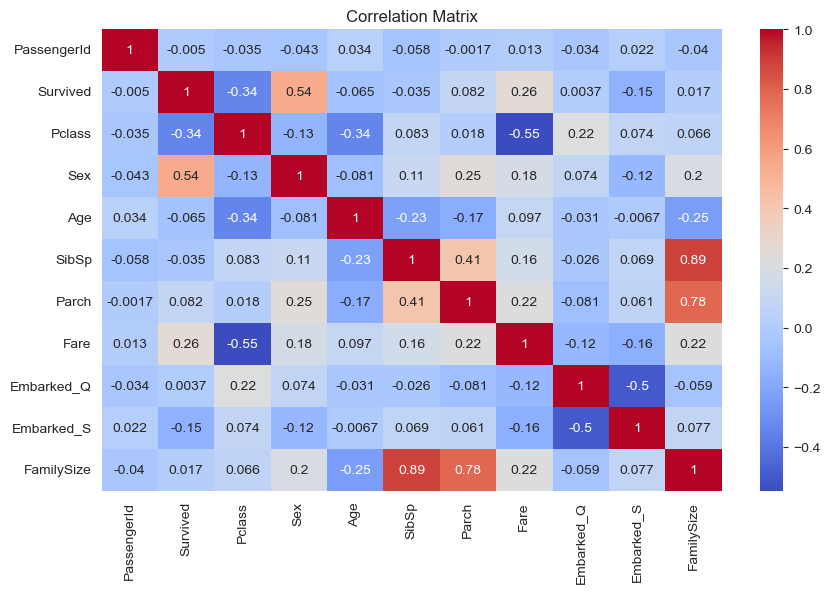


EDA Completed Successfully


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

sns.set_style("whitegrid")

zip_path = r"C:\Users\Bhavana B V\OneDrive\Documents\SKILLS\titanic.zip"

with zipfile.ZipFile(zip_path) as z:
    print("Files inside ZIP:", z.namelist())
    train = pd.read_csv(z.open('train.csv'))
    test = pd.read_csv(z.open('test.csv'))
    gender_submission = pd.read_csv(z.open('gender_submission.csv'))

print("\nTrain Shape:", train.shape)
print("Test Shape:", test.shape)

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

train = train.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])

train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

print("\nMissing values after cleaning:\n")
print(train.isnull().sum())

plt.figure(figsize=(5,4))
sns.countplot(x='Survived', data=train)
plt.title("Survival Count")
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title("Survival by Gender (0=Male, 1=Female)")
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title("Survival by Passenger Class")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title("Age vs Survival")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title("Fare vs Survival")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='FamilySize', hue='Survived', data=train)
plt.title("Family Size vs Survival")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

print("\nEDA Completed Successfully")
